In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from FRED_data_pull import *
from pathlib import Path
from datetime import datetime, timedelta
import os
import dotenv
dotenv.load_dotenv()
api_key = os.environ['FRED_API_KEY']
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error

from pandas.tseries.offsets import MonthEnd

In [3]:
copper = pull_data(['PCOPPUSDM'],
                 'm', api_key)
oil = pull_data(['DCOILWTICO'],
                 'm', api_key)
gasoline = pull_data(['GASREGW'],
                 'm', api_key)
credit_spreads = pull_data(['BAMLC0A1CAAA'],
                 'm', api_key)
mfg_hours = pull_data(['AWHMAN'],
                 'm', api_key)
new_orders = pull_data(['NEWORDER'],
                 'm', api_key)
consumer_new_orders = pull_data(['ACOGNO'],
                 'm', api_key)
housing_permits = pull_data(['PERMIT'],
                 'm', api_key)
yield_curve = pull_data(['T10Y2Y'],
                 'm', api_key)
claims = pull_data(['ICSA'],
                 'm', api_key)
cc_claims = pull_data(['CCSA'],
                 'm', api_key)
real_gdp = pull_data(['GDP'],
                 'q', api_key)
ind_pro = pull_data(['INDPRO'],
                 'm', api_key)
housing_starts = pull_data(['HOUST'],
                 'm', api_key)
retail_sales = pull_data(['RSAFS'],
                 'm', api_key)
commodities_cpi = pull_data(['CPIAUCSL'],
                 'm', api_key)
pce = pull_data(['PCE'],
                 'm', api_key)
pce_prices = pull_data(['PCEPI'],
                 'm', api_key)
unemployment = pull_data(['UNRATE'],
                 'm', api_key)
unemployment_level = pull_data(['UNEMPLOY'],
                 'm', api_key)
employment_level = pull_data(['CE16OV'],
                 'm', api_key)
nfp = pull_data(['PAYEMS'],
                 'm', api_key)
disposable_income = pull_data(['DSPIC96'],
                 'm', api_key)
personal_income = pull_data(['RPI'],
                 'm', api_key)
average_hourly_earnings = pull_data(['AHETPI'],
                 'm', api_key)
capacity_utilization = pull_data(['TCU'],
                 'm', api_key)
stocks = pull_data(['SPASTT01USM661N'],
                 'm', api_key)
business_inventories = pull_data(['BUSINV'],
                 'm', api_key)

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [4]:
file_path = Path("Monthly LEIs from FactSet.xlsx")
monthly_factset_df = pd.read_excel(file_path).set_index('date')
file_path = Path("Quarterly LEIs from FactSet.xlsx")
qtr_factset_df = pd.read_excel(file_path).set_index('date')

In [5]:
monthly_factset_df

,ism_mfg,ism_services,consumer_expectations,expectations_vs_present,financial_conditions
date,,,,,
1994-06-30,65.0,NaN,94.6,NaN,NaN
1994-07-31,64.2,NaN,91.9,1.4,0.669013
1994-08-31,63.0,NaN,89.4,-2.3,0.558440
1994-09-30,62.7,NaN,89.5,0.0,0.556583
1994-10-31,63.0,NaN,87.9,-3.0,0.535594
...,...,...,...,...,...
2024-05-31,45.4,54.1,74.9,-65.9,-0.438661
2024-06-30,49.3,47.3,72.8,-62.5,-0.361519
2024-07-31,47.4,54.2,78.2,-55.4,-0.372235


In [6]:
data_raw = pd.DataFrame()
#data_raw['DXY'] = dollar
data_raw['gas'] = gasoline
data_raw['oil'] = oil
#data_raw['copper'] = copper
data_raw['credit_spreads'] = credit_spreads
#data_raw['yield_curve'] = yield_curve
data_raw['mfg_hours'] = mfg_hours
data_raw['new_orders'] = new_orders
#data_raw['consumer_new_orders'] = consumer_new_orders
data_raw['housing_permits'] = housing_permits
data_raw['claims'] = claims
#data_raw['cc_claims'] = cc_claims
data_raw['ind_pro'] = ind_pro
data_raw['housing_starts'] = housing_starts
data_raw['nfp'] = nfp
data_raw['unemployment'] = unemployment
data_raw['employment_ratio'] = unemployment_level['UNEMPLOY']/employment_level['CE16OV']
data_raw['retail_sales'] = retail_sales['RSAFS'] #/ commodities_cpi['CPIAUCSL']
data_raw['pce'] = pce['PCE']#/pce_prices['PCEPI']
#data_raw['capacity_utilization'] = capacity_utilization
data_raw['disposable_income'] = disposable_income
data_raw['personal_income'] = personal_income
#data_raw['average_hourly_earnings'] = average_hourly_earnings
data_raw['stocks'] = stocks
#data_raw['business_inventories'] = business_inventories


data_raw = data_raw[::-1]

data = (np.log(data_raw) - np.log(data_raw.shift(12)))[1:]
data['unemployment'] = data_raw['unemployment'] - data_raw['unemployment'].shift(12)
#data['yield_curve'] = data_raw['yield_curve']# - data_raw['yield_curve'].shift(12)
data['credit_spreads'] = data_raw['credit_spreads'] - data_raw['credit_spreads'].shift(12)
#data['capacity_utilization'] = data_raw['capacity_utilization'] - data_raw['capacity_utilization'].shift(12)

#data['housing_permits'] = np.log(data_raw['housing_permits'])
#data['housing_starts'] = np.log(data_raw['housing_starts'])

#data['credit_spreads'] = credit_spreads
#data['yield_curve'] = yield_curve
data['ism_mfg'] = monthly_factset_df[['ism_mfg']]
data['ism_services'] = monthly_factset_df[['ism_services']]
#data['fcig'] = monthly_factset_df[['financial_conditions']]
#data['consumer_expectations'] = monthly_factset_df[['consumer_expectations']]
data['expectations_vs_present'] = monthly_factset_df[['expectations_vs_present']] -  monthly_factset_df[['expectations_vs_present']].shift(12)
#data['EXPINF2YR'] = (data_raw['EXPINF2YR'].diff()*1200)[1:]

#data.iloc[-2,3] = np.nan
#data.iloc[-2,4] = np.nan
#data.iloc[-2,5] = np.nan
#data.iloc[-2,6] = np.nan
#data.iloc[-2,7] = np.nan
#data.iloc[-2,8] = np.nan
#data.iloc[-2,9] = np.nan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


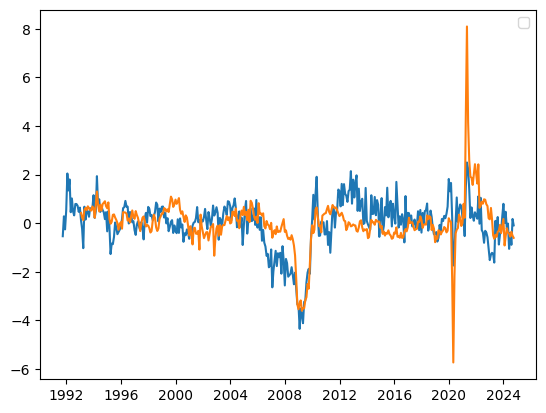

In [7]:
data_norm = (data - data.mean()) / data.std()
plt.plot(data_norm.index, data_norm['housing_starts'])
plt.plot(data_norm.index, data_norm['retail_sales'])
plt.legend()
plt.show()

In [8]:
data_edited = data.copy()

#data_edited['ism_services'] = data_edited['ism_services'].shift(-1)
#data_edited['ism_mfg'] = data_edited['ism_mfg'].shift(-1)
#data_edited['mfg_hours'] = data_edited['mfg_hours'].shift(-1)
#data_edited['copper'] = data_edited['copper'].shift(1)

data_quarterly_raw = data_edited.resample('Q').mean()

In [9]:
#data_quarterly_raw['ceo_confidence'] = qtr_factset_df[['ceo_confidence']]
#data_quarterly_raw['eps_growth'] = qtr_factset_df[['eps_growth']]
data_quarterly_raw['sloos'] = qtr_factset_df[['sloos']]
data_quarterly_raw['real_gdp'] = real_gdp[::-1] / real_gdp[::-1].shift(4) - 1

In [10]:
data_quarterly = data_quarterly_raw.copy().dropna()

In [11]:
#data_quarterly['ceo_confidence'] = data_quarterly['ceo_confidence'].shift(1)
#data_quarterly['fcig'] = data_quarterly['fcig'].shift(2)
#data_quarterly['sloos'] = data_quarterly['sloos'].shift(1)
#data_quarterly['consumer_expectations'] = data_quarterly['consumer_expectations'].shift(2)
#data_quarterly['ism_services'] = data_quarterly['ism_services'].shift(1)
#data_quarterly['ism_mfg'] = data_quarterly['ism_mfg'].shift(2)
#data_quarterly['yield_curve'] = data_quarterly['yield_curve'].shift(5)
#data_quarterly['expectations_vs_present'] = data_quarterly['expectations_vs_present'].shift(5)
#data_quarterly['credit_spreads'] = data_quarterly['credit_spreads'].shift(2)
#data_quarterly['claims'] = data_quarterly['claims'].shift(1)
#data_quarterly['cc_claims'] = data_quarterly['cc_claims'].shift(1)
#data_quarterly['housing_permits'] = data_quarterly['housing_permits'].shift(2)
#data_quarterly['housing_starts'] = data_quarterly['housing_starts'].shift(4)
#data_quarterly['new_orders'] = data_quarterly['new_orders'].shift(1)
#data_quarterly['ind_pro'] = data_quarterly['ind_pro'].shift(1)
#data_quarterly['consumer_new_orders'] = data_quarterly['consumer_new_orders'].shift(1)
#data_quarterly['mfg_hours'] = data_quarterly['mfg_hours'].shift(1)
#data_quarterly['copper'] = data_quarterly['copper'].shift(1)
#data_quarterly['oil'] = data_quarterly['oil'].shift(1)
#data_quarterly['gas'] = data_quarterly['gas'].shift(1)
#data_quarterly['real_gdp'] = data_quarterly['real_gdp'].shift(1)
#data_quarterly['retail_sales'] = data_quarterly['retail_sales'].shift(1)
#data_quarterly['pce'] = data_quarterly['pce'].shift(1)
data_quarterly.dropna(inplace=True)

#data_quarterly = data_quarterly.drop(columns = ['oil', 'gas','housing_permits','yield_curve', 'consumer_expectations','credit_spreads','cc_claims'])

In [14]:
data_quarterly[['stocks','ind_pro','housing_starts','real_gdp','pce','retail_sales',]].corr()

,stocks,ind_pro,housing_starts,real_gdp,pce,retail_sales
stocks,1.000000,0.671935,0.531343,0.533329,0.490521,0.661007
ind_pro,0.671935,1.000000,0.505517,0.789329,0.750712,0.774472
housing_starts,0.531343,0.505517,1.000000,0.376803,0.321666,0.586853
real_gdp,0.533329,0.789329,0.376803,1.000000,0.967066,0.844728
pce,0.490521,0.750712,0.321666,0.967066,1.000000,0.859151
retail_sales,0.661007,0.774472,0.586853,0.844728,0.859151,1.000000


## Nowcasting Model

In [ ]:
monthly_input = data.copy().drop(columns=['housing_starts','housing_permits','ism_mfg','employment_ratio','oil', 'gas', 'disposable_income','personal_income','credit_spreads'])
quarterly_input = qtr_factset_df.copy().drop(columns=['eps_growth','ceo_confidence','sloos'])
#quarterly_input['real_gdp'] = (np.log(real_gdp[::-1]) - np.log(real_gdp[::-1].shift(4)))# * 4
quarterly_input['real_gdp'] = real_gdp[::-1] / real_gdp[::-1].shift(4) - 1

#monthly_input = monthly_input.drop(columns=['credit_spreads',
#                                            'consumer_expectations'])

#for i in range(5*3):
#    col_names = ['date'] + list(monthly_input.columns)
#    new_row = pd.DataFrame([[np.nan]*len(col_names)], columns = col_names)
#    new_row['date'] = monthly_input.index[-1] + MonthEnd(1)
#    new_row = new_row.set_index('date')
#    monthly_input = pd.concat([monthly_input, new_row])

#for i in range(3):
#    col_names = ['date'] + list(quarterly_input.columns)
#    new_row = pd.DataFrame([[np.nan]*len(col_names)], columns = col_names)
#    new_row['date'] = quarterly_input.index[-1] + MonthEnd(3)
#    new_row = new_row.set_index('date')
#    quarterly_input = pd.concat([quarterly_input, new_row])

In [ ]:
#quarterly_input['ceo_confidence'] = quarterly_input['ceo_confidence'].shift(2)
#quarterly_input['sloos'] = quarterly_input['sloos'].shift(1)
#quarterly_input['real_gdp'] = quarterly_input['real_gdp'].shift(1)
#monthly_input['consumer_expectations'] = monthly_input['consumer_expectations'].shift(2*3)
#monthly_input['ism_services'] = monthly_input['ism_services'].shift(3*3)
#monthly_input['ism_mfg'] = monthly_input['ism_mfg'].shift(3*3)
#monthly_input['yield_curve'] = monthly_input['yield_curve'].shift(5*3)
#monthly_input['credit_spreads'] = monthly_input['credit_spreads'].shift(2*3)
#monthly_input['claims'] = monthly_input['claims'].shift(1*3)
#monthly_input['expectations_vs_present'] = monthly_input['expectations_vs_present'].shift(5*3)
#monthly_input['cc_claims'] = monthly_input['cc_claims'].shift(1*3)
#monthly_input['housing_permits'] = monthly_input['housing_permits'].shift(2*3)
#monthly_input['new_orders'] = monthly_input['new_orders'].shift(1*3)
#monthly_input['retail_sales'] = monthly_input['retail_sales'].shift(1*3)
#monthly_input['ind_pro'] = monthly_input['ind_pro'].shift(1*3)
#monthly_input['consumer_new_orders'] = monthly_input['consumer_new_orders'].shift(1*3)
#monthly_input['mfg_hours'] = monthly_input['mfg_hours'].shift(2*3)
#monthly_input['copper'] = monthly_input['copper'].shift(2*3)
#monthly_input['oil'] = monthly_input['oil'].shift(1*3)
#monthly_input['gas'] = monthly_input['gas'].shift(1*3)

#monthly_input = monthly_input[monthly_input.index >= '1997-07-31']
#monthly_input = monthly_input[monthly_input.index >= '1998-10-31']
#quarterly_input = quarterly_input[quarterly_input.index >= '1995-12-31']
monthly_input = monthly_input[monthly_input.index >= '1998-10-31']
#monthly_input = monthly_input[monthly_input.index <= '2024-06-30']
quarterly_input = quarterly_input[quarterly_input.index >= '1998-12-31']

In [ ]:
factors = {#'eps_growth': ['Global'],
           'real_gdp': ['Global'],
           #'copper': ['Global', 'Commodities'],
           #'oil': ['Global', 'Energy Prices'],
           #'gas': ['Global', 'Energy Prices'],
           'mfg_hours': ['Global', 'Manufacturing'],
           'new_orders': ['Global', 'Manufacturing'],
           #'consumer_new_orders': ['Global', 'Manufacturing'],
           'ind_pro': ['Global', 'Manufacturing'],
           #'ism_mfg': ['Global', 'Manufacturing'],
           #'capacity_utilization': ['Global','Manufacturing'],
           'retail_sales': ['Global', 'Consumption and Non-Manufacturing'],
           'pce': ['Global', 'Consumption and Housing'],
           'expectations_vs_present': ['Global', 'Sentiment and Labor'],
           'ism_services': ['Global','Consumption and Housing'],
           #'business_inventories': ['Global','Consumption and Non-Manufacturing'],
           #'ism_services': ['Global','Consumption and Non-Manufacturing'],
           'housing_starts': ['Global','Consumption and Housing'],
           'housing_permits': ['Global','Consumption and Housing'],
           #'average_hourly_earnings': ['Global','Income'],
           #'disposable_income': ['Global','Personal Income'],
           #'personal_income': ['Global','Personal Income'],
           #'ceo_confidence': ['Global', 'Sentiment and Financial Conditions'],
           #'sloos': ['Global', 'Financial Conditions'],
           'nfp': ['Global', 'Sentiment and Labor'],
           'unemployment': ['Global', 'Sentiment and Labor'],
           'claims': ['Global', 'Sentiment and Labor'],
           #'cc_claims': ['Global', 'Labor'],
           #'yield_curve': ['Global', 'Sentiment and Financial Conditions'],
           'stocks': ['Global'],
           #'credit_spreads': ['Global', 'Financial Conditions'],
          }
factor_orders = {'Global': 3}
factor_multiplicities = {'Global': 1}

In [ ]:
monthly_input.index.freq='M'
quarterly_input.index.freq='Q'

#if quarterly_input[-1:].isna().any() is True:
#    cutoff = 2
#else:
#    cutoff = 1

#cutoff_date = quarterly_input.index[-cutoff]

cutoff = 1
cutoff_date = quarterly_input.dropna().index[-cutoff]


In [ ]:
#cutoff = 1
#const_pre = np.ones(len(data)-cutoff)
model = sm.tsa.DynamicFactorMQ(monthly_input[monthly_input.index <= cutoff_date], endog_quarterly=quarterly_input[quarterly_input.index <= cutoff_date], factors=factors, factor_orders=1, factor_multiplicities=factor_multiplicities, freq = 'M')#, enforce_stationarity=False)

model.summary()

In [ ]:
results = model.fit(maxiter=1000000, disp=100)

print(results.summary())

In [ ]:
results.save('gdp_model.pkl')

In [ ]:
#if cutoff > 2:
#    results_appended = results.append(endog = monthly_input[monthly_input.index > cutoff_date], 
#                                      endog_quarterly = quarterly_input[quarterly_input.index > cutoff_date])
#else:
results_appended = results

# Specify the number of steps ahead you want to forecast
steps_ahead = 12  # For example, forecasting 12 months ahead
const_forecast = np.ones(steps_ahead)
# Generate forecasts
forecasts = results_appended.forecast(steps=steps_ahead)

forecast_dates = [cutoff_date + MonthEnd(i) for i in range(1, steps_ahead + 1)]

forecasts.index = forecast_dates

# The 'forecasts' variable now contains the forecasted values for each variable for the next 12 months
print(forecasts)


## Update Forecast

In [ ]:
#start_date = str(data.index[-1])[:7]
#end_date = str(data.index[-1] + timedelta(32))[:7]
def get_news(data, data_quarterly, results, lookback=1, steps_ahead = 1):
    start_date = data_quarterly.dropna().index[-lookback]
    print(start_date)
    end_date = start_date + MonthEnd(steps_ahead*3)
    #end_date = start_date + relativedelta(months=lookback*3+1)
    #end_date = datetime(end_date.year, end_date.month, 1) - timedelta(days=1)
    print(end_date)
    #print(results.summary())

    #const_post_plus1 = np.ones(len(data) + 1)
    news = results.news(data, endog_quarterly = data_quarterly, start=start_date, end=end_date)
    return news

news = get_news(monthly_input, quarterly_input, results_appended)

print(news.summary())

In [ ]:
def update_forecast_data(forecast_df, news):#,length=2):
    #if length < 2:
    #    length = 2
    
    new_df = forecast_df.copy()
    #num_cols = len(new_df.columns)
    for i in range(len(news.impacts)):
        revision_date = news.impacts.index[i][0]
        revision_date = pd.to_datetime(str(revision_date) + "-01") + MonthEnd(1)
        #print(revision_date)
        col_name = news.impacts.index[i][1]
        new_df.loc[revision_date, col_name] = news.impacts.iloc[i,4]
    return new_df


def combine_data(history_df, forecast_df):
    #print(data)
    num_cols = len(history_df.columns)
    if num_cols == len(forecast_df.columns):
        new_df = pd.concat([history_df, forecast_df])
        #new_df = new_df[~new_df.index.duplicated(keep='first')]
        for i in range(num_cols):
            for j in range(1, len(forecast_df)+1):
                if np.isnan(new_df.iloc[-j,i]):
                    new_df.iloc[-j,i] = forecast_df.iloc[-j,i]
        return new_df
    else:
        raise ValueError()

new_forecasts = update_forecast_data(forecasts, news)
#new_forecasts.index = new_forecasts.index.to_timestamp('M')
new_forecasts_quarterly = new_forecasts[quarterly_input.columns].resample('Q').last()
new_data = combine_data(quarterly_input, new_forecasts_quarterly)
new_data.tail(10)

## Recursive Estimation

In [ ]:
def recursive_estimation(data_monthly, data_quarterly, y_names: list, factors = 1, factor_orders = 3, factor_multiplicities = 1, steps_ahead = 1, start_point = 50, missing_vars_q = None, missing_vars_m = None):

    for y_name in y_names:
        if (y_name not in data_monthly.columns) and (y_name not in data_quarterly.columns):
            raise ValueError()
    
    # Find missing vars based on distance from last quarter of full data if no missing vars are inputted 
   # cutoff_date = data_quarterly.dropna().index[-1]
    #next_quarter = cutoff_date+MonthEnd(steps_ahead*3)

    num_blanks_q = len(data_quarterly) - len(data_quarterly.dropna())
    if missing_vars_q is None:
        #missing_vars_q = quarterly_input[quarterly_input.index <= next_quarter].iloc[-num_blanks:].isna().reset_index(drop = True)
        missing_vars_q = quarterly_input.iloc[-num_blanks_q:].isna().reset_index(drop = True)

    num_blanks_m = len(data_monthly) - len(data_monthly.dropna())
    if missing_vars_m is None:
        #missing_vars_m = monthly_input[monthly_input.index <= next_quarter].iloc[-num_blanks*3:].isna().reset_index(drop = True)
        missing_vars_m = monthly_input.iloc[-num_blanks_m:].isna().reset_index(drop = True)

    #if data.index[2] != data_quarterly.index[0]:
        

    #all_columns = list(data_monthly.columns) + list(data_quarterly.columns)
    errors_df = pd.DataFrame(0, index=range(steps_ahead), columns=data_quarterly.columns)
    preds_dfs = [pd.DataFrame(columns=data_quarterly.columns)]*steps_ahead

    if steps_ahead > num_blanks_q:
        T = steps_ahead
    else:
        T = num_blanks_q
    
    for i in range(start_point, len(data_quarterly.dropna())-steps_ahead+1):
    #for i in range(start_point, len(data_quarterly.dropna())-T+1):
        print(len(data_quarterly.dropna()) - i)
        #print(i)
        print(f"Training Sample Ending {str(data_quarterly[:i].index[-1])}")
        model = sm.tsa.DynamicFactorMQ(data_monthly[:i*3], endog_quarterly = data_quarterly[:i], factors=factors, factor_orders=factor_orders, factor_multiplicities = factor_multiplicities)#,enforce_stationarity=False)
        results = model.fit(maxiter=100000, disp=100)

        # Generate forecasts and adjust datetime index to be compatible with rest of data
        forecasts = results.forecast(steps=steps_ahead*3)
        forecast_dates = [data_quarterly.index[i-1] + MonthEnd(k) for k in range(1, steps_ahead*3 + 1)]
        forecasts.index = forecast_dates
        #print(forecasts)

        if missing_vars_q.any().any() or missing_vars_m.any().any():

            # Extend monthly data to include "news"
            #new_cutoff_m = (i+steps_ahead)*3
            new_cutoff_m = i*3+num_blanks_m
            new_data_monthly = data_monthly.copy()[:new_cutoff_m]

            # Extend quarterly data to include "news"
            #new_cutoff_q = i_steps_ahead
            new_cutoff_q = i+num_blanks_q
            new_data_quarterly = data_quarterly.copy()[:new_cutoff_q]

            # Replace values in new monthly data with NAs based on inputted missing variables
            for j, _ in enumerate(new_data_monthly.columns):
                for k in range(num_blanks_m):
                    if missing_vars_m.iloc[k, j] == True:
                        new_data_monthly.iloc[i*3+k, j] = np.nan

           # Replace values in new quarterly data with NAs based on inputted missing variables
            for j, _ in enumerate(new_data_quarterly.columns):
                for k in range(num_blanks_q):
                    if missing_vars_q.iloc[k, j] == True:
                        new_data_quarterly.iloc[i+k, j] = np.nan

            news = get_news(new_data_monthly, new_data_quarterly, results, steps_ahead = steps_ahead)
            #print(new_data_quarterly)
            #print(new_data_monthly)
            #print(news.summary())
            forecasts = update_forecast_data(forecasts, news)
            #print(forecasts)
            #forecasts.index = forecasts.index.to_timestamp('M')
            forecasts = forecasts[data_quarterly.columns].resample('Q').last()
            forecasts = forecasts[:steps_ahead]
            #print(forecasts)
            
        # Compare Observed Values with Forecast and Record Results
        observed = data_quarterly.copy()[i:i+steps_ahead]
        has_nans = observed.isna().any().any()
        if not has_nans:
            error = (forecasts - observed).reset_index(drop = True)
            errors_df = errors_df + error**2
        #display(errors_df)
        
        for k in range(steps_ahead):
            preds_dfs[k] = pd.concat([preds_dfs[k], forecasts[k:k+1]])

    errors_df = (errors_df / (len(data_quarterly.dropna()) - start_point - steps_ahead + 1))**0.5
    
    errors_df = errors_df[y_names]
        
    return preds_dfs, errors_df

In [ ]:
steps_ahead = 1

#next_quarter = cutoff_date+MonthEnd(steps_ahead*3)

start_index=80
start_point = len(quarterly_input.dropna()) - start_index

num_blanks_q = len(quarterly_input) - len(quarterly_input.dropna())
#missing_vars_q = quarterly_input[quarterly_input.index <= next_quarter].iloc[-num_blanks:].isna().reset_index(drop = True)
missing_vars_q = quarterly_input.iloc[-num_blanks_q:].isna().reset_index(drop = True)

num_blanks_m = len(monthly_input) - len(monthly_input.dropna())
#missing_vars_m = monthly_input[monthly_input.index <= next_quarter].iloc[-num_blanks*3:].isna().reset_index(drop = True)
missing_vars_m = monthly_input.iloc[-num_blanks_m:].isna().reset_index(drop = True)

y_names = ['real_gdp']
preds_dfs, errors_df = recursive_estimation(monthly_input,
                                            quarterly_input,
                                            y_names,
                                            factors = factors,
                                            factor_orders = 1,
                                            factor_multiplicities = factor_multiplicities,
                                            steps_ahead = steps_ahead,
                                            start_point = start_point,
                                            missing_vars_q = missing_vars_q,
                                            missing_vars_m = missing_vars_m)

In [ ]:
errors_df

In [ ]:
plt.plot(preds_dfs[0].index, preds_dfs[0]['real_gdp'], label='Predicted')
plt.plot(quarterly_input.index, quarterly_input['real_gdp'], label='Real GDP', linestyle='--')
plt.legend()
plt.show()

In [25]:
preds_dfs[0]['real_gdp'].tail(10)

2022-03-31    0.049886
2022-06-30    0.039355
2022-09-30    0.023587
2022-12-31    0.019162
2023-03-31    0.011632
2023-06-30    0.011184
2023-09-30    0.016154
2023-12-31    0.020728
2024-03-31    0.021240
2024-06-30    0.020970
Freq: Q-DEC, Name: real_gdp, dtype: float64

In [26]:
quarterly_input['real_gdp'].dropna().tail(10)

date
2022-03-31    0.040149
2022-06-30    0.024789
2022-09-30    0.022964
2022-12-31    0.013163
2023-03-31    0.022808
2023-06-30    0.028295
2023-09-30    0.032363
2023-12-31    0.031962
2024-03-31    0.029018
2024-06-30    0.030368
Freq: Q-DEC, Name: real_gdp, dtype: float64

In [336]:
def get_r_squared(var_name, pred_df, actual_df):
    r2 = np.round(np.corrcoef(pred_df[var_name], actual_df[var_name])[1][0]**2*100, 1)
    return r2
         
#mse = errors_df[var_name][0]
r2 = get_r_squared('real_gdp', preds_dfs[0], quarterly_input.dropna()[start_point:])

#print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

R-Squared : 75.5
